In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import glob

In [18]:
# assuming ipynb is in the same directory as spotify data
# read all history files into a dataframe
history = pd.DataFrame()
for name in glob.glob("./20??/StreamingHistory?.json"):
    history = history.append(pd.read_json(name))

In [19]:
# clean up - convert to minutes
# remove tracks listened for less than 30s, and prep endtimes
history['msPlayed'] = history['msPlayed'].div(60000)
history = history[history['msPlayed'] > .5]
history['endTime'] = pd.to_datetime(history['endTime'])

In [20]:
history.head(25)

,artistName,endTime,msPlayed,trackName
0,Hot Lunch,2019-01-01 00:17:00,4.089250,Monks On the Moon
1,Flora Matos,2019-01-01 00:36:00,2.819433,Esperar o Sol
2,Mick Jagger,2019-01-01 01:21:00,4.231633,Gotta Get A Grip - Kevin Parker Remix
3,Frost da Great,2019-01-01 01:54:00,1.264400,Shine Your Light
4,Ought,2019-01-01 01:58:00,4.283450,Beautiful Blue Sky
5,!!!,2019-01-01 02:00:00,2.243933,Hello? Is This Thing On?
6,Plastilina Mosh,2019-01-01 02:04:00,3.835100,Bareta Â´89
7,Cibo Matto,2019-01-01 02:56:00,4.476117,King of Silence - Dan the Automator Remix; 200...
10,Jimi Hendrix,2019-01-01 03:00:00,3.468667,Jungle
11,The Mystery Lights,2019-01-01 03:04:00,4.196883,What Happens When You Turn the Devil Down


# Basic Stats

In [21]:
# some basic stats
uniqueTracks = len(history.trackName.unique())
print("number of tracks listened: ", uniqueTracks)
uniqueArtists = len(history.artistName.unique())
print("number of artists listened: ", uniqueArtists)
minutes = history['msPlayed'].sum()
print("minutes: ", minutes)
print("hours: ", minutes/60)
print("days: ", minutes/60/24)
#print("average hrs/d: ", minutes/60/366)

number of tracks listened:  12471
number of artists listened:  3851
minutes:  198750.64201666668
hours:  3312.510700277778
days:  138.02127917824075


In [22]:
df = history.groupby(history.endTime.dt.date)['msPlayed'].sum()
idx = pd.date_range('2019-01-01', '2020-12-31')
df.index = pd.DatetimeIndex(df.index)
df = df.reindex(idx, fill_value=0)

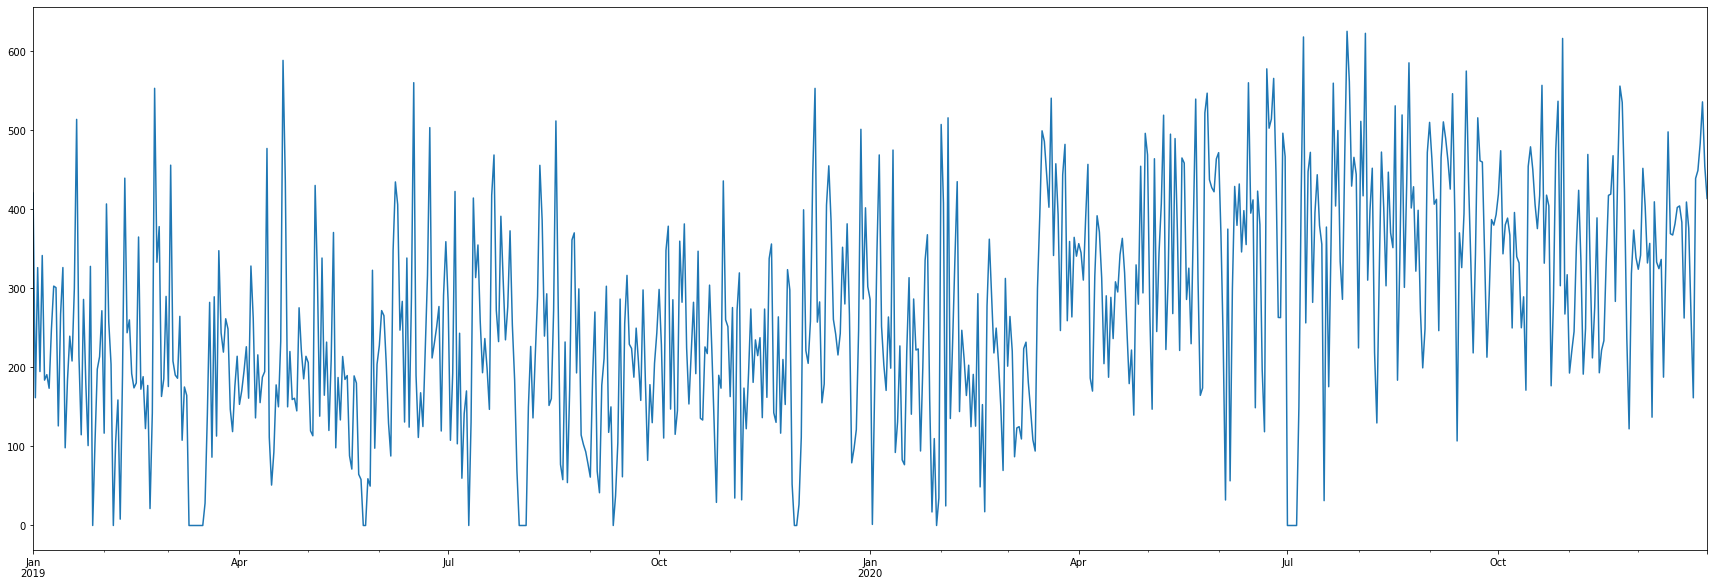

In [33]:
# plot minutes/day
df.plot(figsize=(30,10))

# Most played

In [24]:
# top tracks
history.groupby(['trackName']).artistName.value_counts().nlargest(50)

trackName                                     artistName                      
Borderline                                    Tame Impala                         49
Sense                                         King Gizzard & The Lizard Wizard    46
It Might Be Time                              Tame Impala                         44
Doesn't matter                                Christine and the Queens            42
Patience                                      Tame Impala                         42
Sweep Me Off My Feet                          Pond                                42
Flesh without Blood                           Grimes                              41
Regret                                        St. Vincent                         41
Cockroach En Fleur                            Baroness                            40
Breathe Deeper                                Tame Impala                         36
Cigarettes                                    Tash Sultana             

In [25]:
# plays/artist
history['artistName'].value_counts().nlargest(50)

Tame Impala                           1226
Opeth                                 1038
The Black Keys                         447
Grimes                                 401
The National                           376
Porcupine Tree                         371
Steven Wilson                          365
Sturgill Simpson                       331
Childish Gambino                       319
Pond                                   319
Courtney Barnett                       314
Jimi Hendrix                           301
Against Me!                            299
TOOL                                   286
Tash Sultana                           285
Radio Moscow                           268
Queens of the Stone Age                265
King Gizzard & The Lizard Wizard       253
David Bowie                            248
Rush                                   245
Unknown Mortal Orchestra               243
Hiatus Kaiyote                         239
Led Zeppelin                           236
ZZ Top     

In [26]:
# hours/artist
history.groupby('artistName').msPlayed.sum().nlargest(50)/60

artistName
Opeth                               117.655928
Tame Impala                          88.384672
Steven Wilson                        36.266796
Porcupine Tree                       36.000432
TOOL                                 31.027926
Grimes                               24.564122
The Black Keys                       24.106467
The National                         22.279471
Childish Gambino                     21.189058
Tash Sultana                         20.417163
Pond                                 19.825404
Courtney Barnett                     19.520678
Radio Moscow                         18.838814
Rush                                 18.706523
Sturgill Simpson                     18.445948
Jimi Hendrix                         18.025874
King Gizzard & The Lizard Wizard     17.740246
Queens of the Stone Age              17.301602
Black Sabbath                        17.297681
Led Zeppelin                         17.026443
Unknown Mortal Orchestra             15.853338
Ma